In [1]:
import pandas as pd
df=pd.read_csv("spam.csv",encoding='latin-1')
df.shape

(5572, 5)

In [2]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
df.sample(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1480,ham,Have you always been saying welp?,NaN,NaN,NaN
668,ham,Have a good evening! Ttyl,NaN,NaN,NaN
2096,ham,I'm done...,NaN,NaN,NaN


# 1.Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.isnull().any(axis=0)

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

In [8]:
df.isnull().any(axis=1)

0       True
1       True
2       True
3       True
4       True
        ... 
5567    True
5568    True
5569    True
5570    True
5571    True
Length: 5572, dtype: bool

In [9]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [10]:
#drop the last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [11]:
df.shape

(5572, 2)

In [12]:
df.columns.to_list()

['v1', 'v2']

In [14]:
df.sample(2)

,v1,v2
928,ham,Oh all have to come ah?
564,ham,"Fuck babe ... I miss you already, you know ? C..."


In [15]:
df.sample(4)

,v1,v2
519,ham,Usually the person is unconscious that's in ch...
1828,ham,May i call You later Pls
945,ham,I cant wait to see you! How were the photos we...
2168,ham,Thx. All will be well in a few months


In [17]:
#Rename the columns as v1->target and v2->text

In [16]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [17]:
df.sample(3)

,target,text
2519,ham,Ok. I only ask abt e movie. U wan ktv oso?
1283,ham,Yes i thought so. Thanks.
1512,ham,"Hey sweet, I was wondering when you had a mome..."


In [18]:
#2.EDA
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [23]:
#convert categorical column to numeric: using Label encoder
#import LabelEncoder

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [21]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target']=encoder.fit_transform(df['target'])

In [23]:
df.head(4)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [24]:
df['target'].unique()

array([0, 1])

In [25]:
df.columns

Index(['target', 'text'], dtype='object')

In [26]:
df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

In [18]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [27]:
#check for duplicate values
df.duplicated().sum()

403

In [28]:
#remove duplicate values
df=df.drop_duplicates(keep='first')

In [29]:
df.duplicated().sum()

0

In [30]:
5572-403

5169

In [31]:
df.shape

(5169, 2)

In [32]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

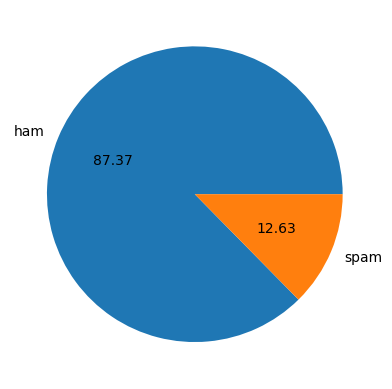

In [33]:
#plot the ratio of ham vs spam
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [34]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
df['num_characters']=df['text'].apply(len)

In [38]:
df.head(6)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148


In [39]:
#from nltk.corpus import word_tokenize
df["num_words"]=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [40]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [41]:
df["num_setntences"]=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [42]:
df.head(4)

,target,text,num_characters,num_words,num_setntences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1


In [43]:
#describe
df[df['target']==0][['num_characters','num_words','num_setntences']].describe()

,num_characters,num_words,num_setntences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [44]:
#ham
df[df['target']==0][['num_characters','num_words','num_setntences']].describe()

,num_characters,num_words,num_setntences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [45]:
#spam
df[df['target']==1][['num_characters','num_words','num_setntences']].describe()

,num_characters,num_words,num_setntences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


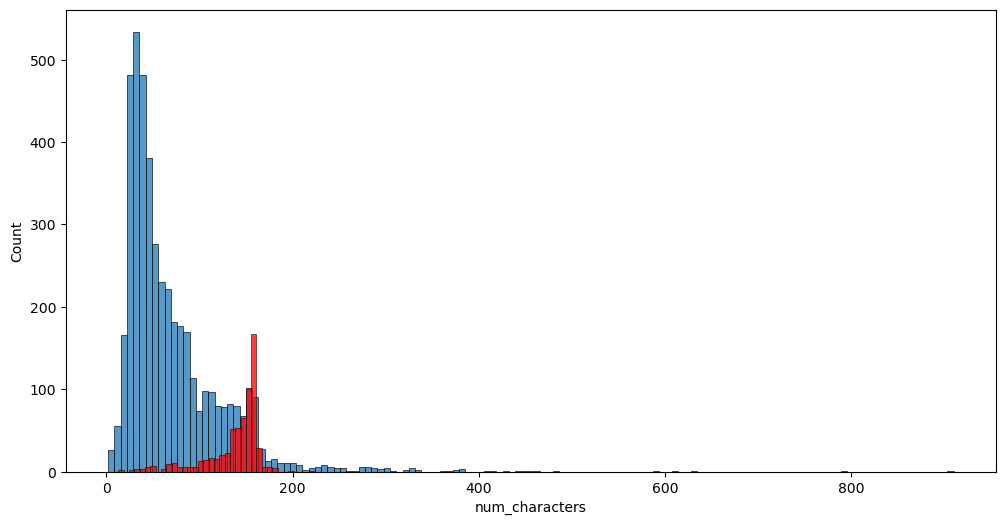

In [47]:
plt.figure(figsize=(12,6))
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.show()

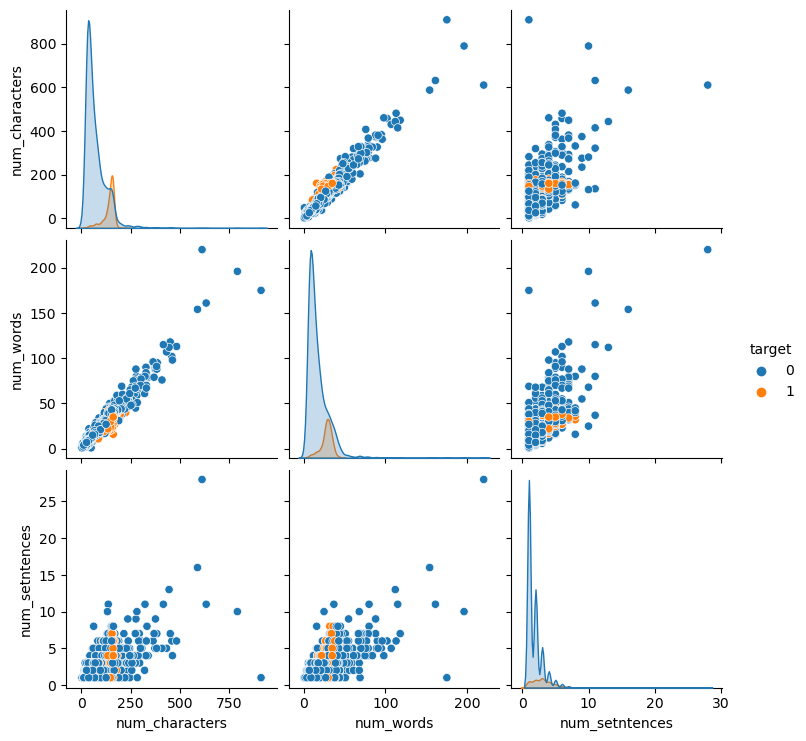

In [48]:
sns.pairplot(df,hue='target')
plt.show()

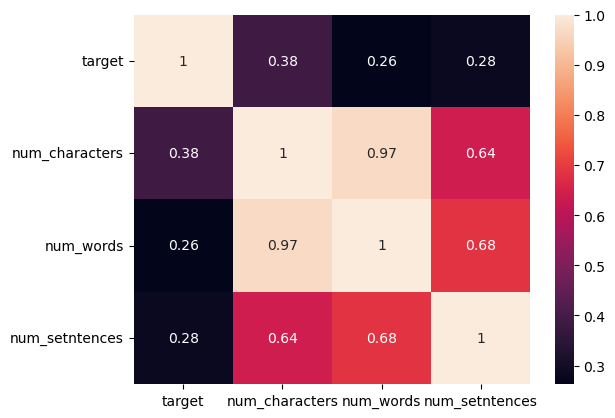

In [49]:
#coorelation
df.corr()
sns.heatmap(df.corr(),annot=True)
plt.show()

<AxesSubplot:>

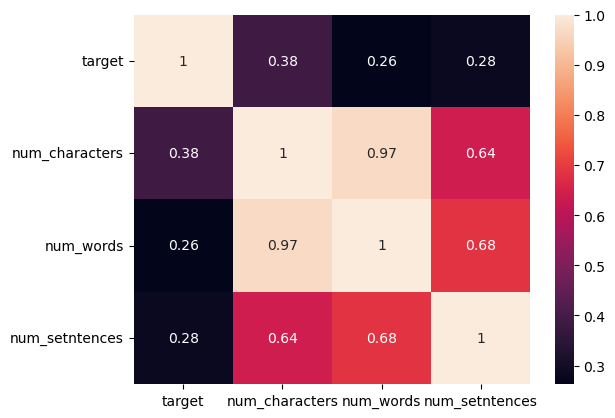

In [38]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#3. Data Preprocessing
#Lower case
#Tokenization
#Removing special characters
#Removing stop words and punctuation
#Stemming

In [51]:
#data preprocessing: lower
def transform_text(text):
    text=text.lower()
    return text
transform_text("NLP class Welcomes To YOU ALL")

'nlp class welcomes to you all'

In [53]:
#tokenization
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    return text
transform_text("NLP class Welcomes To YOU ALL")

['nlp', 'class', 'welcomes', 'to', 'you', 'all']

In [55]:
#removing special characters
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    return y
transform_text("NLP class Welcomes To #YOU ALL@")

['nlp', 'class', 'welcomes', 'to', 'you', 'all']

In [56]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [57]:
#punctuation
import string
string.punctuation
print(len(string.punctuation))

32


In [58]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [59]:
#final method transfor_text
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [34]:
# Alternative method using Regular Expression
'''import re
corpus=[]
for i in range(len(df)):
  review=re.sub("[^a-zA-Z]"," ",df['text'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)
  '''


In [60]:
df['transformed_text'] = df['text'].apply(transform_text)


In [61]:
df.sample(4)

,target,text,num_characters,num_words,num_setntences,transformed_text
2768,0,I am on the way to ur home,26,8,1,way ur home
647,1,PRIVATE! Your 2003 Account Statement for shows...,136,23,3,privat 2003 account statement show 800 point c...
5138,0,Yup... I havent been there before... You want ...,88,22,3,yup havent want go yoga call book
501,0,When can Ì_ come out?,21,6,1,come


In [62]:
#Conversion of text into numeric vector using BOW
#Try for tfidf
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=500)

In [63]:
X=cv.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 500)

In [64]:
df.head(3)

,target,text,num_characters,num_words,num_setntences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [66]:
y = df['target'].values

In [67]:
#Splitting of dataset into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [68]:
#4.Model Building using naive bayes classifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [69]:
# Using GaussianNB
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7040618955512572
[[592 293]
 [ 13 136]]
0.317016317016317


In [70]:
# Using MultinomialNB
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[875  10]
 [ 19 130]]
0.9285714285714286


In [72]:
# Using BernoulliNB
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9787234042553191
[[883   2]
 [ 20 129]]
0.9847328244274809


In [ ]:
# Find the accuracy score uding tfidf vectorizer
'''
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)
'''